In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('./Dataset_teste_Just_BI.csv', sep=";")

**Aponte resultados de vendas por ano: Gross Revenue, Net Revenue, Boxes (em Gráfico e
Tabela)**

,years,revenues,values
0,2013,net_revenue,5295828
1,2014,net_revenue,10161460
2,2015,net_revenue,10611613
3,2013,gross_revenue,6134328
4,2014,gross_revenue,11505225
5,2015,gross_revenue,12019567
6,2013,boxes,156289
7,2014,boxes,291647
8,2015,boxes,292778


<Axes: xlabel='years', ylabel='values'>

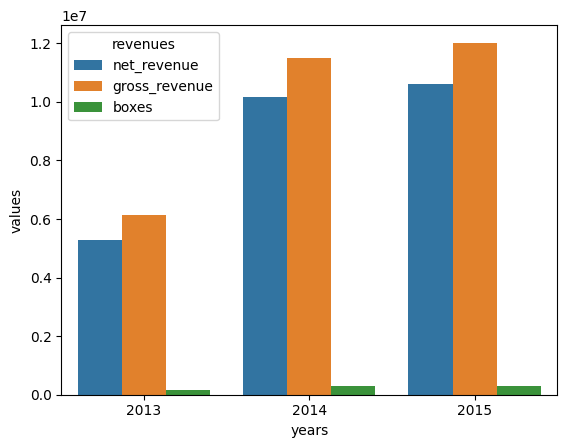

In [3]:
df_results_per_year = df.filter(items=['year', 'net_revenue', 'gross_revenue', 'boxes']).groupby('year').sum()

years_list = ['2013', '2014', '2015']
df_results_per_year['years'] = years_list

df_results_per_year = df_results_per_year[['net_revenue', 'gross_revenue', 'boxes', 'years']]
df_results_per_year = df_results_per_year.melt('years', var_name='revenues', value_name='values')


# Table
display(df_results_per_year)

# Plot
sns.barplot(df_results_per_year, x='years', y='values', hue='revenues')

**Qual customer_acquision_channel teve maior Ticket Médio em 2013 e em 2015?**

In [4]:
highest_average_ticket_customer_acquision_channel = df.filter(items=['year', 'customer_acquisition_channel']).groupby('year').value_counts()

# Result
highest_average_ticket_customer_acquision_channel

year  customer_acquisition_channel
2013  Paid Marketing                  121299
      Referral                         25878
2014  Paid Marketing                  227005
      Referral                         53489
2015  Paid Marketing                  214637
      Referral                         73567
Name: count, dtype: int64

,years,variable,values
0,2013,customer_id,35851
1,2015,customer_id,51643


<Axes: xlabel='years', ylabel='values'>

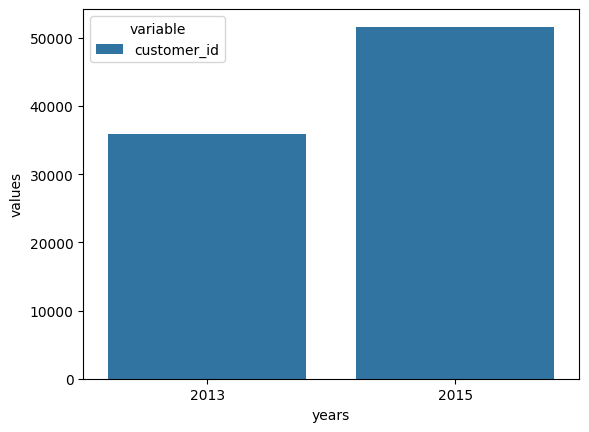

In [5]:
unique_customers = df.filter(items=['year', 'customer_id']).groupby('year').nunique().drop(2014)

years_list = ['2013', '2015']
unique_customers['years'] = years_list

unique_customers = unique_customers[['customer_id', 'years']]
unique_customers = unique_customers.melt('years', value_name='values')

# Table
display(unique_customers)

# Plot
sns.barplot(unique_customers, x='years', y='values', hue='variable')

**Quais dados complementares você julga que seriam importantes para incrementar suas análises em relação a resultados de vendas e análises sobre os clientes?**

Visando descobrir em qual nicho os clientes se encaixam, para que se possa elencar estratégias de vendas em cima destas categorias, acredito que estes dados seriam relevantes:

- Faixa etária
- Sexo
- Estado
- Quantidade de produtos em uma só compra
- Escolaridade (talvez)

*obs:* baseado no sistema de tráfego pago do Facebook Business